# Description

Runs k-means on the pca version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [6]:
INITIAL_RANDOM_STATE = 10000

## Input data

In [7]:
INPUT_SUBSET = "pca"

In [8]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [10]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

'pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full'

## Clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [13]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10

display(CLUSTERING_OPTIONS)

{'K_MIN': 2, 'K_MAX': 60, 'N_REPS_PER_K': 5, 'KMEANS_N_INIT': 10}

In [14]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = KMeans(
            n_clusters=k,
            n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [15]:
display(len(CLUSTERERS))

295

In [16]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('KMeans #0', KMeans(n_clusters=2, random_state=10000))

('KMeans #1', KMeans(n_clusters=2, random_state=10001))

In [17]:
clustering_method_name = method_name
display(clustering_method_name)

'KMeans'

## Output directory

In [18]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [19]:
data = pd.read_pickle(input_filepath)

In [20]:
data.shape

(3752, 50)

In [21]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,0.805216,-0.865390,0.699480,-0.065976,0.999617,-0.418645,1.993288,-0.346875,-1.522978,-2.382791,...,0.777932,0.507896,0.693668,1.024260,0.189606,-1.661826,0.281234,-0.096792,-0.339508,0.041431
100002_raw-Energy,0.588507,-1.491772,1.756340,-3.593295,2.100607,0.364910,1.254815,2.028484,-0.357607,-4.832726,...,-0.780215,-2.285033,-0.607663,-2.727018,1.711667,-0.535025,2.342068,0.197519,1.636996,-1.114410
100003_raw-Protein,1.910160,-1.873687,1.876677,-3.832557,1.240704,2.941375,2.293978,0.802473,0.665380,-4.375319,...,-0.547161,0.514721,0.034145,-0.423218,-0.324825,-0.000958,0.294579,1.186937,0.226722,0.169931
100004_raw-Fat,0.750799,-0.294733,1.317710,-1.346081,2.006403,0.533509,-0.752916,0.937515,-0.572191,-2.451612,...,0.060359,-0.878309,-0.774943,-1.914890,2.559763,1.547267,1.851110,-0.310431,3.495624,-1.595785
100005_raw-Carbohydrate,-0.530044,-0.007398,0.611418,-3.604094,2.227872,0.051271,0.001135,2.303819,-0.387759,-5.686184,...,-1.110273,-3.032541,-1.223873,-0.945626,2.150276,-1.798716,2.526678,0.716987,0.300972,-0.893854


In [22]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [23]:
from clustering.ensembles.utils import generate_ensemble

In [24]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  1%|          | 2/295 [00:00<00:22, 12.87it/s]

  1%|          | 3/295 [00:00<00:24, 11.80it/s]

  2%|▏         | 5/295 [00:00<00:24, 11.79it/s]

  2%|▏         | 7/295 [00:00<00:24, 11.70it/s]

  3%|▎         | 9/295 [00:00<00:24, 11.69it/s]

  4%|▎         | 11/295 [00:00<00:26, 10.64it/s]

  4%|▍         | 12/295 [00:01<00:29,  9.64it/s]

  4%|▍         | 13/295 [00:01<00:32,  8.69it/s]

  5%|▍         | 14/295 [00:01<00:32,  8.72it/s]

  5%|▌         | 15/295 [00:01<00:35,  7.95it/s]

  5%|▌         | 16/295 [00:01<00:41,  6.80it/s]

  6%|▌         | 17/295 [00:01<00:43,  6.37it/s]

  6%|▌         | 18/295 [00:02<00:46,  5.97it/s]

  6%|▋         | 19/295 [00:02<00:51,  5.38it/s]

  7%|▋         | 20/295 [00:02<00:49,  5.57it/s]

  7%|▋         | 21/295 [00:02<00:54,  5.01it/s]

  7%|▋         | 22/295 [00:02<00:54,  5.00it/s]

  8%|▊         | 23/295 [00:03<00:54,  4.99it/s]

  8%|▊         | 24/295 [00:03<00:55,  4.86it/s]

  8%|▊         | 25/295 [00:03<00:54,  4.91it/s]

  9%|▉         | 26/295 [00:03<01:03,  4.26it/s]

  9%|▉         | 27/295 [00:04<01:04,  4.13it/s]

  9%|▉         | 28/295 [00:04<01:08,  3.92it/s]

 10%|▉         | 29/295 [00:04<01:13,  3.59it/s]

 10%|█         | 30/295 [00:05<01:12,  3.68it/s]

 11%|█         | 31/295 [00:05<01:12,  3.62it/s]

 11%|█         | 32/295 [00:05<01:11,  3.68it/s]

 11%|█         | 33/295 [00:05<01:11,  3.64it/s]

 12%|█▏        | 34/295 [00:06<01:15,  3.46it/s]

 12%|█▏        | 35/295 [00:06<01:15,  3.43it/s]

 12%|█▏        | 36/295 [00:06<01:18,  3.29it/s]

 13%|█▎        | 37/295 [00:07<01:16,  3.37it/s]

 13%|█▎        | 38/295 [00:07<01:18,  3.28it/s]

 13%|█▎        | 39/295 [00:07<01:22,  3.12it/s]

 14%|█▎        | 40/295 [00:08<01:27,  2.92it/s]

 14%|█▍        | 41/295 [00:08<01:24,  2.99it/s]

 14%|█▍        | 42/295 [00:08<01:22,  3.07it/s]

 15%|█▍        | 43/295 [00:09<01:26,  2.90it/s]

 15%|█▍        | 44/295 [00:09<01:32,  2.70it/s]

 15%|█▌        | 45/295 [00:09<01:35,  2.62it/s]

 16%|█▌        | 46/295 [00:10<01:37,  2.55it/s]

 16%|█▌        | 47/295 [00:10<01:38,  2.51it/s]

 16%|█▋        | 48/295 [00:11<01:33,  2.64it/s]

 17%|█▋        | 49/295 [00:11<01:34,  2.60it/s]

 17%|█▋        | 50/295 [00:11<01:35,  2.55it/s]

 17%|█▋        | 51/295 [00:12<01:34,  2.59it/s]

 18%|█▊        | 52/295 [00:12<01:32,  2.63it/s]

 18%|█▊        | 53/295 [00:13<01:29,  2.71it/s]

 18%|█▊        | 54/295 [00:13<01:30,  2.66it/s]

 19%|█▊        | 55/295 [00:13<01:31,  2.63it/s]

 19%|█▉        | 56/295 [00:14<01:30,  2.64it/s]

 19%|█▉        | 57/295 [00:14<01:33,  2.54it/s]

 20%|█▉        | 58/295 [00:15<01:37,  2.43it/s]

 20%|██        | 59/295 [00:15<01:38,  2.39it/s]

 20%|██        | 60/295 [00:15<01:39,  2.35it/s]

 21%|██        | 61/295 [00:16<01:43,  2.27it/s]

 21%|██        | 62/295 [00:16<01:44,  2.23it/s]

 21%|██▏       | 63/295 [00:17<01:40,  2.31it/s]

 22%|██▏       | 64/295 [00:17<01:38,  2.34it/s]

 22%|██▏       | 65/295 [00:18<01:37,  2.36it/s]

 22%|██▏       | 66/295 [00:18<01:38,  2.33it/s]

 23%|██▎       | 67/295 [00:18<01:36,  2.36it/s]

 23%|██▎       | 68/295 [00:19<01:39,  2.28it/s]

 23%|██▎       | 69/295 [00:19<01:36,  2.34it/s]

 24%|██▎       | 70/295 [00:20<01:36,  2.33it/s]

 24%|██▍       | 71/295 [00:20<01:33,  2.40it/s]

 24%|██▍       | 72/295 [00:21<01:38,  2.27it/s]

 25%|██▍       | 73/295 [00:21<01:36,  2.30it/s]

 25%|██▌       | 74/295 [00:22<01:40,  2.20it/s]

 25%|██▌       | 75/295 [00:22<01:37,  2.27it/s]

 26%|██▌       | 76/295 [00:22<01:37,  2.24it/s]

 26%|██▌       | 77/295 [00:23<01:37,  2.23it/s]

 26%|██▋       | 78/295 [00:23<01:41,  2.13it/s]

 27%|██▋       | 79/295 [00:24<01:38,  2.18it/s]

 27%|██▋       | 80/295 [00:24<01:39,  2.16it/s]

 27%|██▋       | 81/295 [00:25<01:39,  2.15it/s]

 28%|██▊       | 82/295 [00:25<01:40,  2.13it/s]

 28%|██▊       | 83/295 [00:26<01:39,  2.13it/s]

 28%|██▊       | 84/295 [00:26<01:38,  2.14it/s]

 29%|██▉       | 85/295 [00:27<01:41,  2.08it/s]

 29%|██▉       | 86/295 [00:27<01:41,  2.07it/s]

 29%|██▉       | 87/295 [00:28<01:37,  2.13it/s]

 30%|██▉       | 88/295 [00:28<01:40,  2.05it/s]

 30%|███       | 89/295 [00:29<01:36,  2.13it/s]

 31%|███       | 90/295 [00:29<01:36,  2.11it/s]

 31%|███       | 91/295 [00:30<01:37,  2.10it/s]

 31%|███       | 92/295 [00:30<01:34,  2.14it/s]

 32%|███▏      | 93/295 [00:31<01:35,  2.12it/s]

 32%|███▏      | 94/295 [00:31<01:35,  2.10it/s]

 32%|███▏      | 95/295 [00:32<01:38,  2.04it/s]

 33%|███▎      | 96/295 [00:32<01:37,  2.04it/s]

 33%|███▎      | 97/295 [00:32<01:37,  2.04it/s]

 33%|███▎      | 98/295 [00:33<01:37,  2.03it/s]

 34%|███▎      | 99/295 [00:33<01:34,  2.07it/s]

 34%|███▍      | 100/295 [00:34<01:36,  2.02it/s]

 34%|███▍      | 101/295 [00:34<01:35,  2.02it/s]

 35%|███▍      | 102/295 [00:35<01:36,  2.01it/s]

 35%|███▍      | 103/295 [00:36<01:38,  1.95it/s]

 35%|███▌      | 104/295 [00:36<01:38,  1.94it/s]

 36%|███▌      | 105/295 [00:37<01:35,  1.98it/s]

 36%|███▌      | 106/295 [00:37<01:37,  1.93it/s]

 36%|███▋      | 107/295 [00:38<01:36,  1.94it/s]

 37%|███▋      | 108/295 [00:38<01:36,  1.95it/s]

 37%|███▋      | 109/295 [00:39<01:33,  2.00it/s]

 37%|███▋      | 110/295 [00:39<01:32,  2.00it/s]

 38%|███▊      | 111/295 [00:40<01:33,  1.96it/s]

 38%|███▊      | 112/295 [00:40<01:35,  1.91it/s]

 38%|███▊      | 113/295 [00:41<01:35,  1.90it/s]

 39%|███▊      | 114/295 [00:41<01:37,  1.86it/s]

 39%|███▉      | 115/295 [00:42<01:35,  1.89it/s]

 39%|███▉      | 116/295 [00:42<01:34,  1.90it/s]

 40%|███▉      | 117/295 [00:43<01:33,  1.91it/s]

 40%|████      | 118/295 [00:43<01:32,  1.92it/s]

 40%|████      | 119/295 [00:44<01:30,  1.94it/s]

 41%|████      | 120/295 [00:44<01:32,  1.89it/s]

 41%|████      | 121/295 [00:45<01:32,  1.89it/s]

 41%|████▏     | 122/295 [00:45<01:33,  1.85it/s]

 42%|████▏     | 123/295 [00:46<01:32,  1.86it/s]

 42%|████▏     | 124/295 [00:47<01:33,  1.83it/s]

 42%|████▏     | 125/295 [00:47<01:38,  1.73it/s]

 43%|████▎     | 126/295 [00:48<01:37,  1.74it/s]

 43%|████▎     | 127/295 [00:48<01:36,  1.74it/s]

 43%|████▎     | 128/295 [00:49<01:34,  1.77it/s]

 44%|████▎     | 129/295 [00:49<01:33,  1.77it/s]

 44%|████▍     | 130/295 [00:50<01:34,  1.75it/s]

 44%|████▍     | 131/295 [00:51<01:35,  1.72it/s]

 45%|████▍     | 132/295 [00:51<01:38,  1.66it/s]

 45%|████▌     | 133/295 [00:52<01:35,  1.69it/s]

 45%|████▌     | 134/295 [00:52<01:32,  1.74it/s]

 46%|████▌     | 135/295 [00:53<01:35,  1.68it/s]

 46%|████▌     | 136/295 [00:54<01:39,  1.60it/s]

 46%|████▋     | 137/295 [00:54<01:34,  1.68it/s]

 47%|████▋     | 138/295 [00:55<01:34,  1.67it/s]

 47%|████▋     | 139/295 [00:55<01:32,  1.69it/s]

 47%|████▋     | 140/295 [00:56<01:31,  1.69it/s]

 48%|████▊     | 141/295 [00:57<01:30,  1.71it/s]

 48%|████▊     | 142/295 [00:57<01:30,  1.70it/s]

 48%|████▊     | 143/295 [00:58<01:30,  1.69it/s]

 49%|████▉     | 144/295 [00:58<01:32,  1.64it/s]

 49%|████▉     | 145/295 [00:59<01:33,  1.60it/s]

 49%|████▉     | 146/295 [01:00<01:30,  1.65it/s]

 50%|████▉     | 147/295 [01:00<01:27,  1.70it/s]

 50%|█████     | 148/295 [01:01<01:25,  1.71it/s]

 51%|█████     | 149/295 [01:01<01:27,  1.67it/s]

 51%|█████     | 150/295 [01:02<01:24,  1.71it/s]

 51%|█████     | 151/295 [01:03<01:26,  1.66it/s]

 52%|█████▏    | 152/295 [01:03<01:27,  1.63it/s]

 52%|█████▏    | 153/295 [01:04<01:25,  1.67it/s]

 52%|█████▏    | 154/295 [01:04<01:25,  1.66it/s]

 53%|█████▎    | 155/295 [01:05<01:26,  1.62it/s]

 53%|█████▎    | 156/295 [01:06<01:27,  1.59it/s]

 53%|█████▎    | 157/295 [01:06<01:24,  1.64it/s]

 54%|█████▎    | 158/295 [01:07<01:24,  1.62it/s]

 54%|█████▍    | 159/295 [01:08<01:23,  1.63it/s]

 54%|█████▍    | 160/295 [01:08<01:22,  1.65it/s]

 55%|█████▍    | 161/295 [01:09<01:24,  1.59it/s]

 55%|█████▍    | 162/295 [01:09<01:23,  1.59it/s]

 55%|█████▌    | 163/295 [01:10<01:25,  1.55it/s]

 56%|█████▌    | 164/295 [01:11<01:25,  1.54it/s]

 56%|█████▌    | 165/295 [01:11<01:24,  1.54it/s]

 56%|█████▋    | 166/295 [01:12<01:28,  1.46it/s]

 57%|█████▋    | 167/295 [01:13<01:25,  1.49it/s]

 57%|█████▋    | 168/295 [01:14<01:25,  1.49it/s]

 57%|█████▋    | 169/295 [01:14<01:24,  1.48it/s]

 58%|█████▊    | 170/295 [01:15<01:23,  1.49it/s]

 58%|█████▊    | 171/295 [01:16<01:23,  1.49it/s]

 58%|█████▊    | 172/295 [01:16<01:21,  1.50it/s]

 59%|█████▊    | 173/295 [01:17<01:20,  1.52it/s]

 59%|█████▉    | 174/295 [01:18<01:22,  1.46it/s]

 59%|█████▉    | 175/295 [01:18<01:21,  1.48it/s]

 60%|█████▉    | 176/295 [01:19<01:19,  1.49it/s]

 60%|██████    | 177/295 [01:20<01:20,  1.47it/s]

 60%|██████    | 178/295 [01:20<01:20,  1.46it/s]

 61%|██████    | 179/295 [01:21<01:18,  1.47it/s]

 61%|██████    | 180/295 [01:22<01:17,  1.49it/s]

 61%|██████▏   | 181/295 [01:22<01:18,  1.45it/s]

 62%|██████▏   | 182/295 [01:23<01:18,  1.44it/s]

 62%|██████▏   | 183/295 [01:24<01:18,  1.43it/s]

 62%|██████▏   | 184/295 [01:25<01:18,  1.41it/s]

 63%|██████▎   | 185/295 [01:25<01:16,  1.44it/s]

 63%|██████▎   | 186/295 [01:26<01:15,  1.44it/s]

 63%|██████▎   | 187/295 [01:27<01:15,  1.44it/s]

 64%|██████▎   | 188/295 [01:27<01:17,  1.37it/s]

 64%|██████▍   | 189/295 [01:28<01:16,  1.38it/s]

 64%|██████▍   | 190/295 [01:29<01:15,  1.39it/s]

 65%|██████▍   | 191/295 [01:29<01:12,  1.43it/s]

 65%|██████▌   | 192/295 [01:30<01:14,  1.38it/s]

 65%|██████▌   | 193/295 [01:31<01:14,  1.37it/s]

 66%|██████▌   | 194/295 [01:32<01:14,  1.36it/s]

 66%|██████▌   | 195/295 [01:32<01:12,  1.38it/s]

 66%|██████▋   | 196/295 [01:33<01:12,  1.37it/s]

 67%|██████▋   | 197/295 [01:34<01:11,  1.37it/s]

 67%|██████▋   | 198/295 [01:35<01:11,  1.36it/s]

 67%|██████▋   | 199/295 [01:35<01:11,  1.35it/s]

 68%|██████▊   | 200/295 [01:36<01:09,  1.37it/s]

 68%|██████▊   | 201/295 [01:37<01:08,  1.36it/s]

 68%|██████▊   | 202/295 [01:38<01:08,  1.36it/s]

 69%|██████▉   | 203/295 [01:38<01:06,  1.38it/s]

 69%|██████▉   | 204/295 [01:39<01:05,  1.39it/s]

 69%|██████▉   | 205/295 [01:40<01:05,  1.37it/s]

 70%|██████▉   | 206/295 [01:40<01:04,  1.39it/s]

 70%|███████   | 207/295 [01:41<01:04,  1.35it/s]

 71%|███████   | 208/295 [01:42<01:03,  1.37it/s]

 71%|███████   | 209/295 [01:43<01:04,  1.33it/s]

 71%|███████   | 210/295 [01:43<01:02,  1.35it/s]

 72%|███████▏  | 211/295 [01:44<01:02,  1.35it/s]

 72%|███████▏  | 212/295 [01:45<01:02,  1.32it/s]

 72%|███████▏  | 213/295 [01:46<01:02,  1.31it/s]

 73%|███████▎  | 214/295 [01:46<01:00,  1.33it/s]

 73%|███████▎  | 215/295 [01:47<00:59,  1.34it/s]

 73%|███████▎  | 216/295 [01:48<00:59,  1.33it/s]

 74%|███████▎  | 217/295 [01:49<01:01,  1.28it/s]

 74%|███████▍  | 218/295 [01:50<00:59,  1.29it/s]

 74%|███████▍  | 219/295 [01:50<00:59,  1.29it/s]

 75%|███████▍  | 220/295 [01:51<00:57,  1.31it/s]

 75%|███████▍  | 221/295 [01:52<00:55,  1.33it/s]

 75%|███████▌  | 222/295 [01:53<00:54,  1.34it/s]

 76%|███████▌  | 223/295 [01:53<00:55,  1.29it/s]

 76%|███████▌  | 224/295 [01:54<00:54,  1.31it/s]

 76%|███████▋  | 225/295 [01:55<00:54,  1.29it/s]

 77%|███████▋  | 226/295 [01:56<00:53,  1.30it/s]

 77%|███████▋  | 227/295 [01:57<00:54,  1.25it/s]

 77%|███████▋  | 228/295 [01:57<00:53,  1.25it/s]

 78%|███████▊  | 229/295 [01:58<00:52,  1.26it/s]

 78%|███████▊  | 230/295 [01:59<00:51,  1.26it/s]

 78%|███████▊  | 231/295 [02:00<00:50,  1.27it/s]

 79%|███████▊  | 232/295 [02:01<00:50,  1.25it/s]

 79%|███████▉  | 233/295 [02:01<00:48,  1.28it/s]

 79%|███████▉  | 234/295 [02:02<00:48,  1.27it/s]

 80%|███████▉  | 235/295 [02:03<00:46,  1.30it/s]

 80%|████████  | 236/295 [02:04<00:46,  1.28it/s]

 80%|████████  | 237/295 [02:04<00:45,  1.27it/s]

 81%|████████  | 238/295 [02:05<00:45,  1.27it/s]

 81%|████████  | 239/295 [02:06<00:45,  1.24it/s]

 81%|████████▏ | 240/295 [02:07<00:44,  1.24it/s]

 82%|████████▏ | 241/295 [02:08<00:42,  1.27it/s]

 82%|████████▏ | 242/295 [02:08<00:42,  1.25it/s]

 82%|████████▏ | 243/295 [02:09<00:41,  1.25it/s]

 83%|████████▎ | 244/295 [02:10<00:41,  1.24it/s]

 83%|████████▎ | 245/295 [02:11<00:39,  1.26it/s]

 83%|████████▎ | 246/295 [02:12<00:39,  1.24it/s]

 84%|████████▎ | 247/295 [02:12<00:37,  1.27it/s]

 84%|████████▍ | 248/295 [02:13<00:37,  1.26it/s]

 84%|████████▍ | 249/295 [02:14<00:36,  1.25it/s]

 85%|████████▍ | 250/295 [02:15<00:36,  1.24it/s]

 85%|████████▌ | 251/295 [02:16<00:35,  1.23it/s]

 85%|████████▌ | 252/295 [02:17<00:35,  1.22it/s]

 86%|████████▌ | 253/295 [02:17<00:35,  1.19it/s]

 86%|████████▌ | 254/295 [02:18<00:34,  1.19it/s]

 86%|████████▋ | 255/295 [02:19<00:35,  1.14it/s]

 87%|████████▋ | 256/295 [02:20<00:33,  1.15it/s]

 87%|████████▋ | 257/295 [02:21<00:32,  1.17it/s]

 87%|████████▋ | 258/295 [02:22<00:31,  1.16it/s]

 88%|████████▊ | 259/295 [02:23<00:30,  1.17it/s]

 88%|████████▊ | 260/295 [02:23<00:29,  1.17it/s]

 88%|████████▊ | 261/295 [02:24<00:28,  1.19it/s]

 89%|████████▉ | 262/295 [02:25<00:26,  1.22it/s]

 89%|████████▉ | 263/295 [02:26<00:26,  1.22it/s]

 89%|████████▉ | 264/295 [02:27<00:25,  1.19it/s]

 90%|████████▉ | 265/295 [02:28<00:25,  1.20it/s]

 90%|█████████ | 266/295 [02:29<00:25,  1.15it/s]

 91%|█████████ | 267/295 [02:29<00:24,  1.15it/s]

 91%|█████████ | 268/295 [02:30<00:24,  1.12it/s]

 91%|█████████ | 269/295 [02:31<00:22,  1.14it/s]

 92%|█████████▏| 270/295 [02:32<00:22,  1.13it/s]

 92%|█████████▏| 271/295 [02:33<00:21,  1.12it/s]

 92%|█████████▏| 272/295 [02:34<00:19,  1.15it/s]

 93%|█████████▎| 273/295 [02:35<00:19,  1.14it/s]

 93%|█████████▎| 274/295 [02:36<00:18,  1.13it/s]

 93%|█████████▎| 275/295 [02:36<00:17,  1.13it/s]

 94%|█████████▎| 276/295 [02:37<00:16,  1.13it/s]

 94%|█████████▍| 277/295 [02:38<00:15,  1.14it/s]

 94%|█████████▍| 278/295 [02:39<00:15,  1.13it/s]

 95%|█████████▍| 279/295 [02:40<00:14,  1.13it/s]

 95%|█████████▍| 280/295 [02:41<00:13,  1.12it/s]

 95%|█████████▌| 281/295 [02:42<00:12,  1.11it/s]

 96%|█████████▌| 282/295 [02:43<00:11,  1.11it/s]

 96%|█████████▌| 283/295 [02:44<00:10,  1.10it/s]

 96%|█████████▋| 284/295 [02:45<00:09,  1.11it/s]

 97%|█████████▋| 285/295 [02:45<00:09,  1.10it/s]

 97%|█████████▋| 286/295 [02:46<00:08,  1.07it/s]

 97%|█████████▋| 287/295 [02:47<00:07,  1.08it/s]

 98%|█████████▊| 288/295 [02:48<00:06,  1.08it/s]

 98%|█████████▊| 289/295 [02:49<00:05,  1.07it/s]

 98%|█████████▊| 290/295 [02:50<00:04,  1.09it/s]

 99%|█████████▊| 291/295 [02:51<00:03,  1.08it/s]

 99%|█████████▉| 292/295 [02:52<00:02,  1.08it/s]

 99%|█████████▉| 293/295 [02:53<00:01,  1.07it/s]

100%|█████████▉| 294/295 [02:54<00:00,  1.07it/s]

100%|██████████| 295/295 [02:55<00:00,  1.06it/s]

100%|██████████| 295/295 [02:55<00:00,  1.68it/s]

In [25]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [26]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2


In [27]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [28]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [29]:
assert ensemble_stats["min"] > 1

In [30]:
assert not ensemble["n_clusters"].isna().any()

In [31]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [32]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [33]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [34]:
from sklearn.metrics import calinski_harabasz_score

In [35]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [36]:
ensemble.shape

(295, 4)

In [37]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,304.680774
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,304.701541
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,304.680774
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,304.680774
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,304.680774


## Save

In [38]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [39]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [40]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,304.684927
3,222.658296
4,195.677053
5,165.847854
6,150.035249
7,137.633368
8,127.081909
9,123.155455
10,118.586928


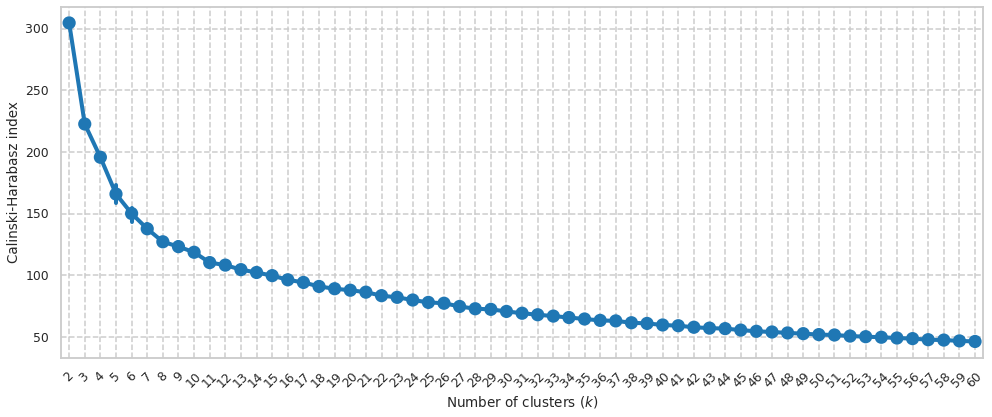

In [41]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [42]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [43]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
4    [[2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0,...
5    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6    [[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,...
dtype: object

In [44]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [45]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [46]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [47]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

3     0.999865
4     0.995490
2     0.986394
6     0.558648
5     0.401821
7     0.259557
10    0.236972
8     0.232272
13    0.197406
9     0.181900
12    0.179984
15    0.161994
14    0.160958
11    0.157481
17    0.156888
Name: k, dtype: float64

In [48]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [49]:
parts_ari_df.shape

(59, 10)

In [50]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [51]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,0.965985,1.000000,1.000000,1.000000,0.965985,0.965985,0.965985,1.000000,1.000000,1.000000
3,1.000000,1.000000,0.999663,1.000000,1.000000,0.999663,1.000000,0.999663,1.000000,0.999663
4,1.000000,0.998359,0.989549,0.998359,0.998359,0.989549,0.998359,0.991182,1.000000,0.991182
5,0.409101,0.421868,0.512494,0.217490,0.952441,0.321469,0.341152,0.323168,0.331316,0.187712
6,0.353808,1.000000,0.350372,0.946196,0.353808,0.599797,0.345537,0.350372,0.946196,0.340391


## Save

In [52]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-stability-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [53]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [54]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [55]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [56]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,0.965985
1,2,1,1.000000
2,2,2,1.000000
3,2,3,1.000000
4,2,4,0.965985


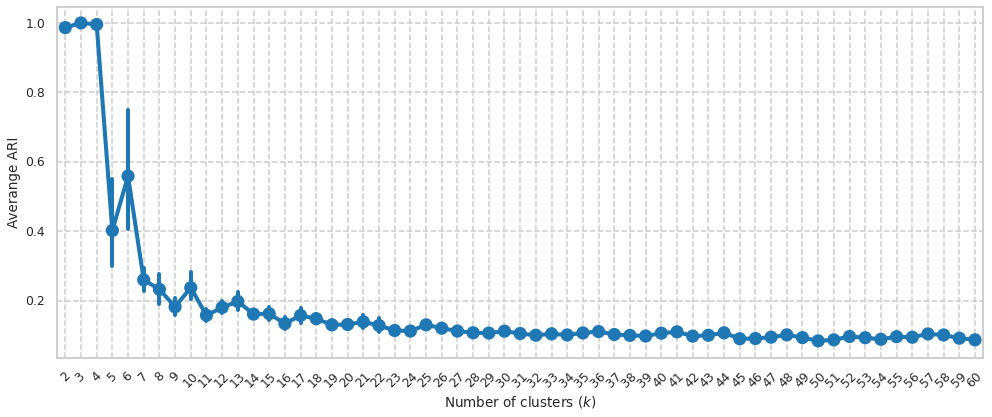

In [57]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()